# Actividad 5: Uso de software para búsqueda.


**Equipo:**

Rafael Medellín García 2021626

Patricio Leija Treviño 1996641

Juan Carlos Garcia Reyes 2000889

Carlos Andrés Chávez Rivera 2109415

Carlos Eduardo Estrada Hernández 2109339
   
**Hora:** Martes N4-N6

# **Cargar Librerías**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Librerías de apoyo
import numpy as np
import matplotlib.pyplot as plt

# **Cargar Datos**

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **Preprocesamiento de Datos**

In [ ]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

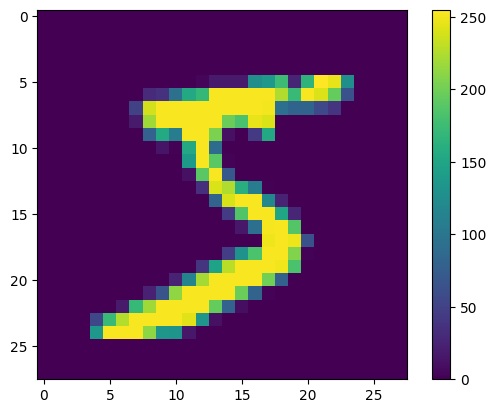

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

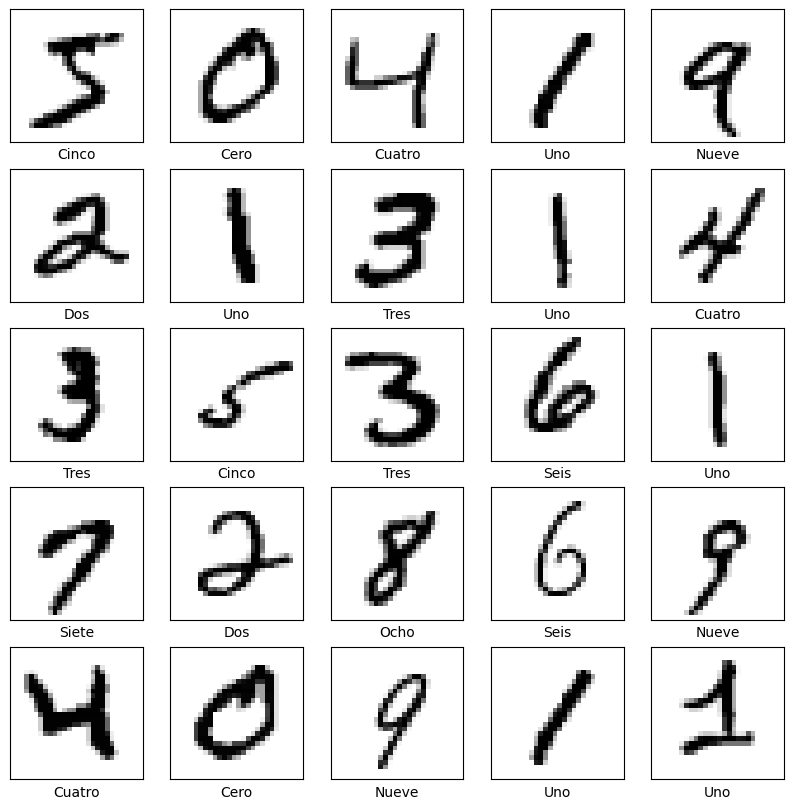

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Selección y entrenamiento del modelo**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2273 - accuracy: 0.9327
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0963 - accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0504 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0423 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0313 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0281 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0249 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0814 - accuracy: 0.9793 - 650ms/epoch - 2ms/step

Test accuracy: 0.9793000221252441


# **Prueba de modelo**

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[15]

array([5.3573048e-14, 7.3447953e-10, 6.7504804e-12, 2.4045378e-06,
       1.6624843e-16, 9.9999756e-01, 7.3049666e-13, 4.8360350e-11,
       1.6589274e-12, 7.0607808e-10], dtype=float32)

In [ ]:
np.argmax(predictions[15])

5

In [ ]:
test_labels[15]

5

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

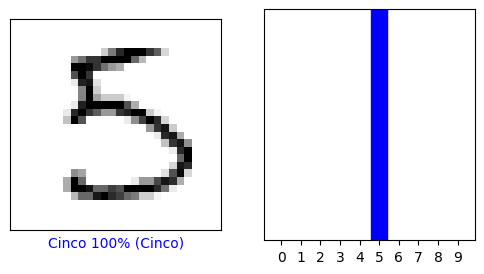

In [ ]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

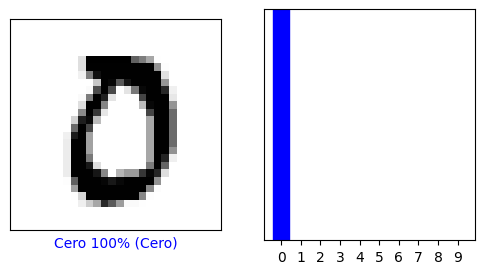

In [ ]:
i = 28
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

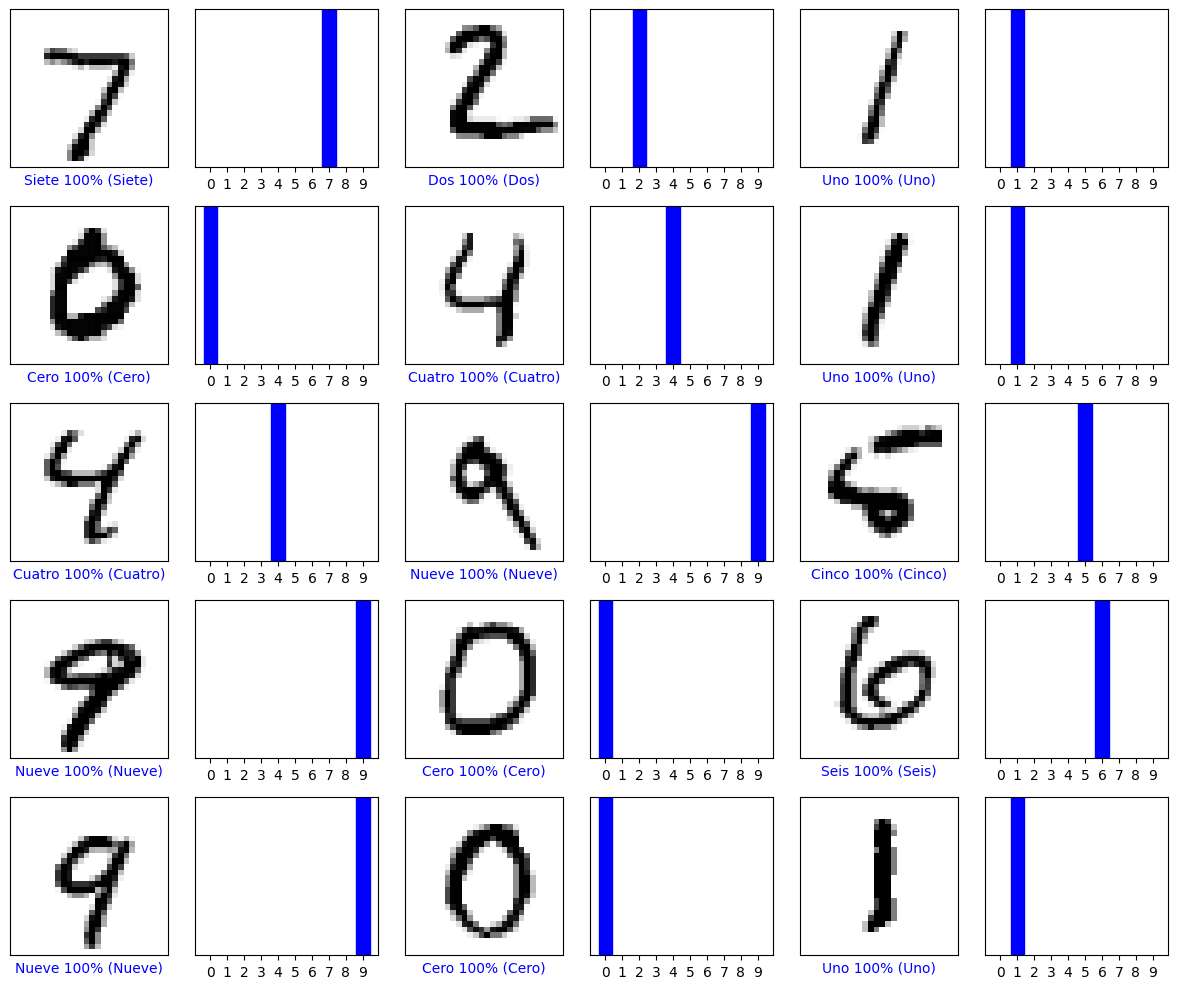

In [ ]:
# El color azul indica una predicción correcta y el color rojo indica una predicción incorrecta.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()